In [ ]:
# ==========================================
# STEP 1: MOUNT DRIVE & MOVE DATA TO LOCAL
# ==========================================
from google.colab import drive
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented).zip"
local_zip = "/content/dataset.zip"
extract_path = "/content/dataset_unzipped"

if not os.path.exists(extract_path):
    print("Copying and Unzipping... please wait.")
    !cp "{zip_path}" "{local_zip}"
    with zipfile.ZipFile(local_zip, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Unzipping complete.")

search_path = None
for root, dirs, files in os.walk(extract_path):
    if 'train' in dirs:
        search_path = os.path.join(root, 'train')
        break
DATASET_DIR = search_path if search_path else extract_path

# ==========================================
# STEP 2: DATA GENERATORS (NEW CLASSES)
# ==========================================
IMG_SIZE = (128, 128)
BATCH_SIZE = 64

# UPDATED CLASSES
selected_classes = [
    "Tomato___healthy", "Tomato___Diseased",
    "Potato___healthy", "Potato___Diseased",
    "Corn_(maize)___healthy", "Corn_(maize)___Diseased",
    "Strawberry___healthy", "Strawberry___Diseased",
    "Brinjal___healthy", "Brinjal___Diseased"
]

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=selected_classes,
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=selected_classes,
    subset="validation",
    shuffle=False
)

# ==========================================
# STEP 3: MODEL ARCHITECTURE
# ==========================================
NUM_CLASSES = len(selected_classes) # Automatically becomes 10

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==========================================
# STEP 4: TRAINING
# ==========================================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\nStarting Training...")
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[early_stop]
)

# ==========================================
# STEP 5: EVALUATION & CONFUSION MATRIX
# ==========================================
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

val_gen.reset()
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes
labels = list(train_gen.class_indices.keys())

# Plot Confusion Matrix
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=[l.replace('___', ' ') for l in labels],
            yticklabels=[l.replace('___', ' ') for l in labels])
plt.xticks(rotation=45, ha='right')
plt.title("Confusion Matrix (10 Classes)")
plt.show()

print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=labels))

# Save the model immediately
model.save('plant_disease_model.keras')

In [2]:
from google.colab import drive
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
zip_path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented).zip"
local_zip = "/content/dataset.zip"
extract_path = "/content/dataset_unzipped"

In [5]:
if not os.path.exists(extract_path):
    print("Copying and Unzipping... please wait.")
    !cp "{zip_path}" "{local_zip}"
    with zipfile.ZipFile(local_zip, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Unzipping complete.")

Copying and Unzipping... please wait.
Unzipping complete.


In [6]:
search_path = None
for root, dirs, files in os.walk(extract_path):
    if 'train' in dirs:
        search_path = os.path.join(root, 'train')
        break
DATASET_DIR = search_path if search_path else extract_path

In [7]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 64

# UPDATED CLASSES
selected_classes = [
    "Tomato___healthy", "Tomato___Diseased",
    "Potato___healthy", "Potato___Diseased",
    "Corn_(maize)___healthy", "Corn_(maize)___Diseased",
    "Strawberry___healthy", "Strawberry___Diseased",
    "Brinjal___healthy", "Brinjal___Diseased"
]

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=selected_classes,
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=selected_classes,
    subset="validation",
    shuffle=False
)

Found 14849 images belonging to 10 classes.
Found 3705 images belonging to 10 classes.


In [8]:
NUM_CLASSES = len(selected_classes) # Automatically becomes 10

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\nStarting Training...")
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[early_stop]
)


Starting Training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
233/233 ━━━━━━━━━━━━━━━━━━━━ 950s 4s/step - accuracy: 0.6428 - loss: 2.4070 - val_accuracy: 0.1854 - val_loss: 30.5166
Epoch 2/15
233/233 ━━━━━━━━━━━━━━━━━━━━ 953s 4s/step - accuracy: 0.8219 - loss: 0.6773 - val_accuracy: 0.4602 - val_loss: 7.1371
Epoch 3/15
233/233 ━━━━━━━━━━━━━━━━━━━━ 918s 4s/step - accuracy: 0.8609 - loss: 0.4754 - val_accuracy: 0.9026 - val_loss: 0.3745
Epoch 4/15
233/233 ━━━━━━━━━━━━━━━━━━━━ 930s 4s/step - accuracy: 0.8943 - loss: 0.3517 - val_accuracy: 0.7711 - val_loss: 1.1309
Epoch 5/15
233/233 ━━━━━━━━━━━━━━━━━━━━ 938s 4s/step - accuracy: 0.9026 - loss: 0.3338 - val_accuracy: 0.5028 - val_loss: 3.9368
Epoch 6/15
233/233 ━━━━━━━━━━━━━━━━━━━━ 923s 4s/step - accuracy: 0.9205 - loss: 0.2826 - val_accuracy: 0.6823 - val_loss: 2.7591


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

val_gen.reset()
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes
labels = list(train_gen.class_indices.keys())

58/58 ━━━━━━━━━━━━━━━━━━━━ 58s 992ms/step


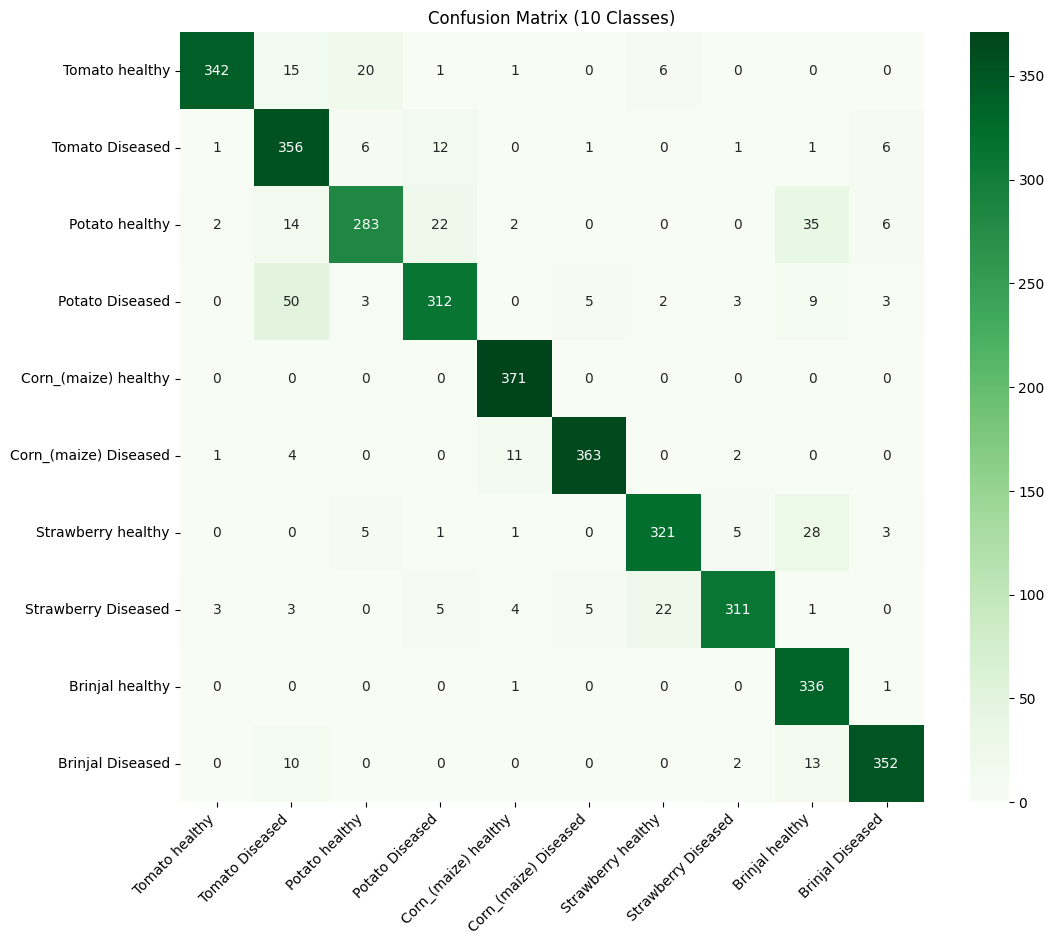


--- Classification Report ---
                         precision    recall  f1-score   support

       Tomato___healthy       0.98      0.89      0.93       385
      Tomato___Diseased       0.79      0.93      0.85       384
       Potato___healthy       0.89      0.78      0.83       364
      Potato___Diseased       0.88      0.81      0.84       387
 Corn_(maize)___healthy       0.95      1.00      0.97       371
Corn_(maize)___Diseased       0.97      0.95      0.96       381
   Strawberry___healthy       0.91      0.88      0.90       364
  Strawberry___Diseased       0.96      0.88      0.92       354
      Brinjal___healthy       0.79      0.99      0.88       338
     Brinjal___Diseased       0.95      0.93      0.94       377

               accuracy                           0.90      3705
              macro avg       0.91      0.90      0.90      3705
           weighted avg       0.91      0.90      0.90      3705



In [11]:
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=[l.replace('___', ' ') for l in labels],
            yticklabels=[l.replace('___', ' ') for l in labels])
plt.xticks(rotation=45, ha='right')
plt.title("Confusion Matrix (10 Classes)")
plt.show()

print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=labels))

In [13]:
# 1. Define the save path in your Google Drive
save_path = '/content/drive/MyDrive/plant_disease_model.keras'

# 2. Save the model
model.save(save_path)

print(f"✅ Model saved successfully to: {save_path}")

✅ Model saved successfully to: /content/drive/MyDrive/plant_disease_model.keras
